<a href="https://colab.research.google.com/github/kuroinuhakuryu/repo-PNN/blob/main/LAB_4_1_mz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
from pylab import *

In [2]:
im=Image.open('bear.jpg')

## Исходное изображение:

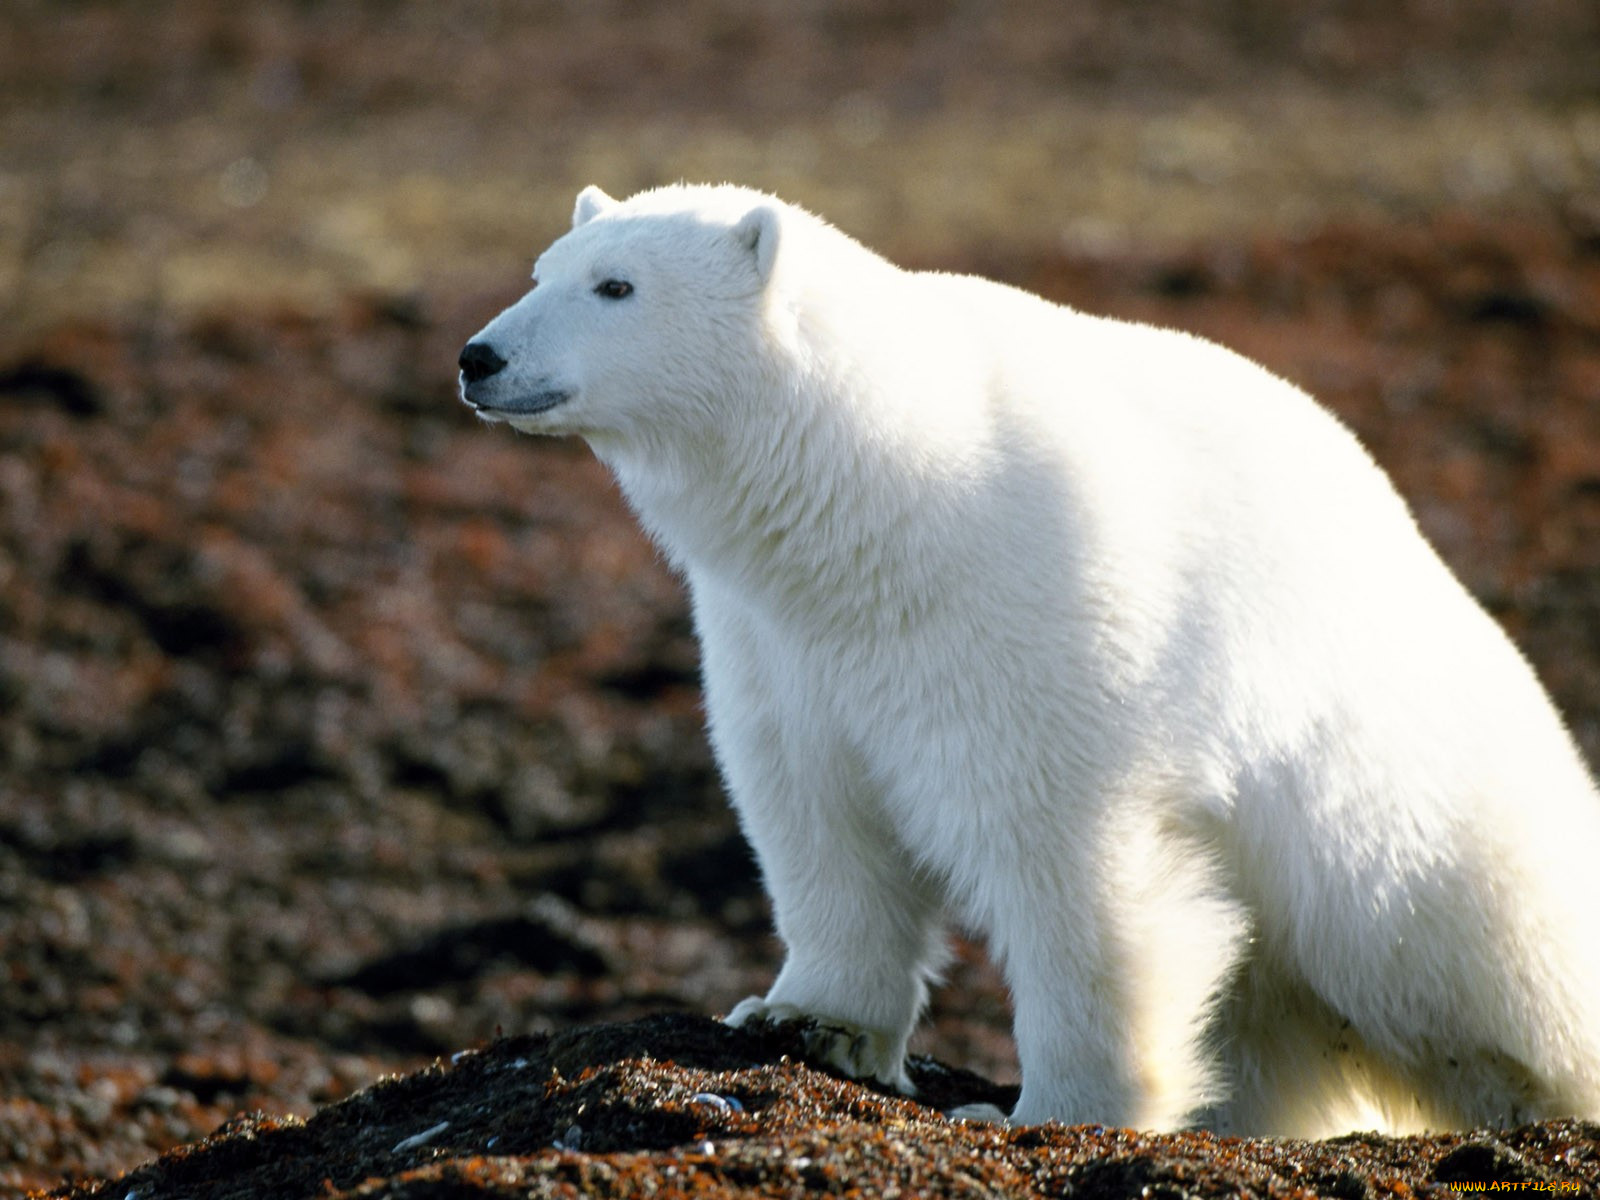

In [3]:
im

## Задание 1. Узнать размеры исходного изображения

In [4]:
width, height = im.size

In [5]:
print(width, height)

1600 1200


## Задание 2. Получить гистограммы по каналам цвета

<Figure size 432x288 with 0 Axes>

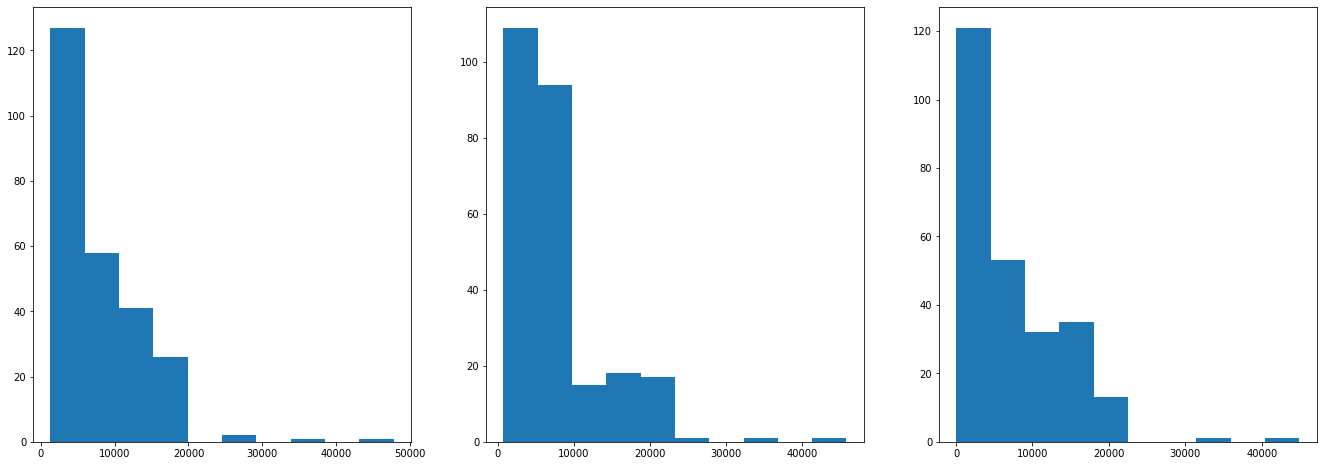

In [8]:
im7 =Image.open('bear.jpg')
r, g, b = im7.split()
figure()
plt.figure(figsize=(23, 8))
subplot(1,3,1), hist(r.histogram(),10)
subplot(1,3,2), hist(g.histogram(),10)
subplot(1,3,3), hist(b.histogram(),10)
show()

<Figure size 432x288 with 0 Axes>

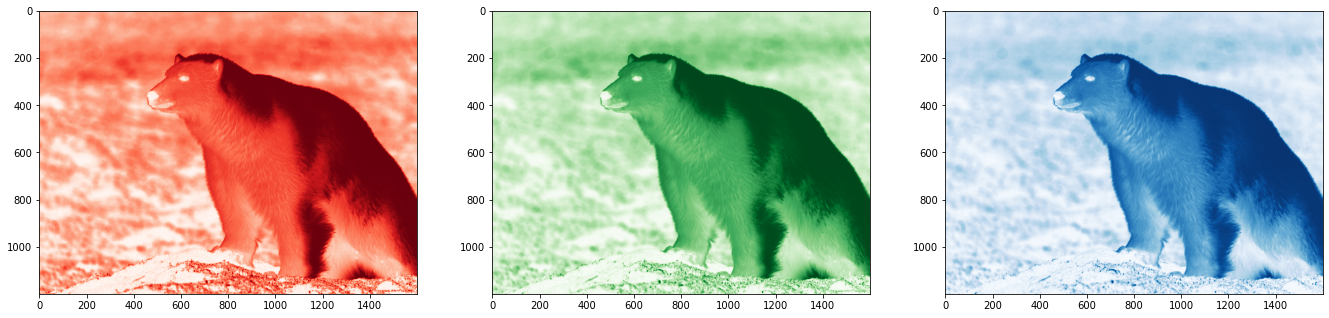

In [9]:
r, g, b = im7.split()
figure()
plt.figure(figsize=(23, 8))
subplot(1,3,1), imshow(np.array(r), cmap='Reds')
subplot(1,3,2), imshow(np.array(g), cmap='Greens')
subplot(1,3,3), imshow(np.array(b), cmap='Blues')
show()

## Задание 3. Для полутонового изображения p1 и его инвертированного изображения постройте гистограммы

In [10]:
im=Image.open('bear.jpg')

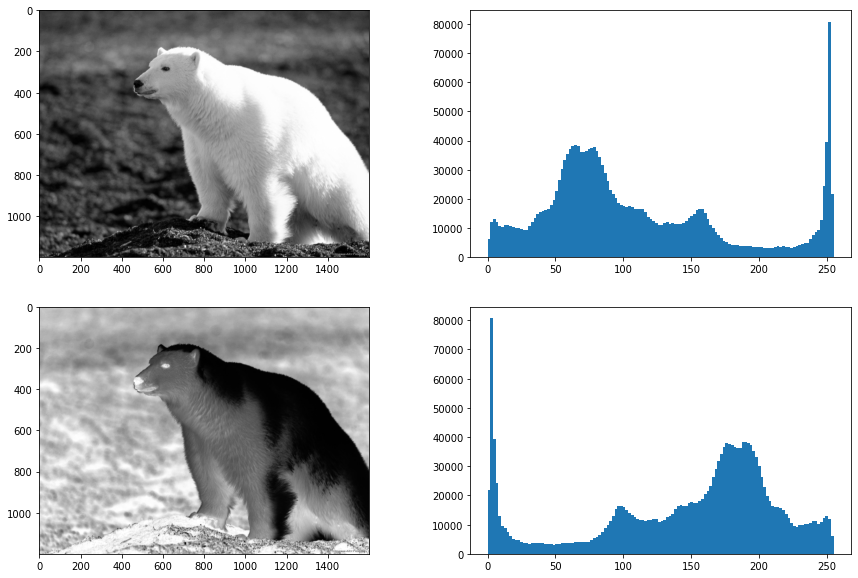

In [11]:
im = array(im.convert('L'))
inv = 255 - np.array(im)
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(np.array(im), cmap="gray")
subplot(2,2,2), hist(np.array(im).flatten(), 128)
subplot(2,2,3), imshow(inv, cmap="gray")
subplot(2,2,4), hist(np.array(inv).flatten(), 128)
show()

In [12]:
pim4 = Image.fromarray(uint8(inv)) 

In [17]:
pim4.save('bear_pim4.jpg')

## Задание 4. Измените яркость полутонового изображения p1 с помощью квадратичной функции, постройте гистограмму получившегося изображения

In [18]:
im5 = 255.0*(im/255)**2

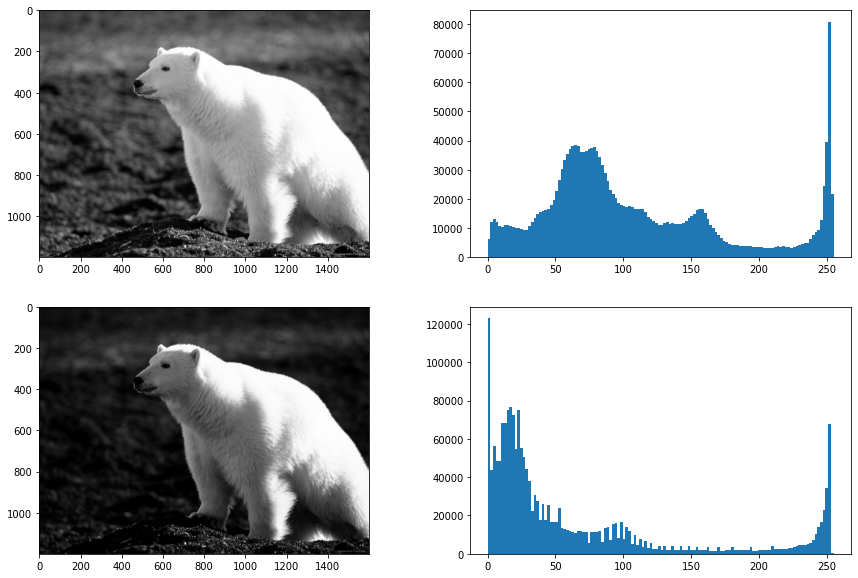

In [19]:
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(np.array(im), cmap="gray")
subplot(2,2,2), hist(np.array(im).flatten(), 128)
subplot(2,2,3), imshow(im5, cmap="gray")
subplot(2,2,4), hist(np.array(im5).flatten(), 128)
show()

In [20]:
pim5 = Image.fromarray(uint8(im5)) 

In [21]:
pim5.save('bear_pim5.jpg')

## Задание 5. Выровните гистограмму изображения p1 с помощью кумулятивной функции распределения значений пикселей в изображении.

In [22]:
def hst(im, ib=256):
    imh, b = histogram(im.flatten(),ib,normed=True)
    cdf = imh.cumsum()
    cdf = 255*cdf/cdf[-1]
    im2 = interp(im.flatten(),b[:-1],cdf)
    return im2.reshape(im.shape), cdf

im6, cdf = hst(im)
pim6 = Image.fromarray(uint8(im6)) 
pim6.save('bear_pim6.jpg')

<ipython-input-22-4c72d9bd1cf2>:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imh, b = histogram(im.flatten(),ib,normed=True)


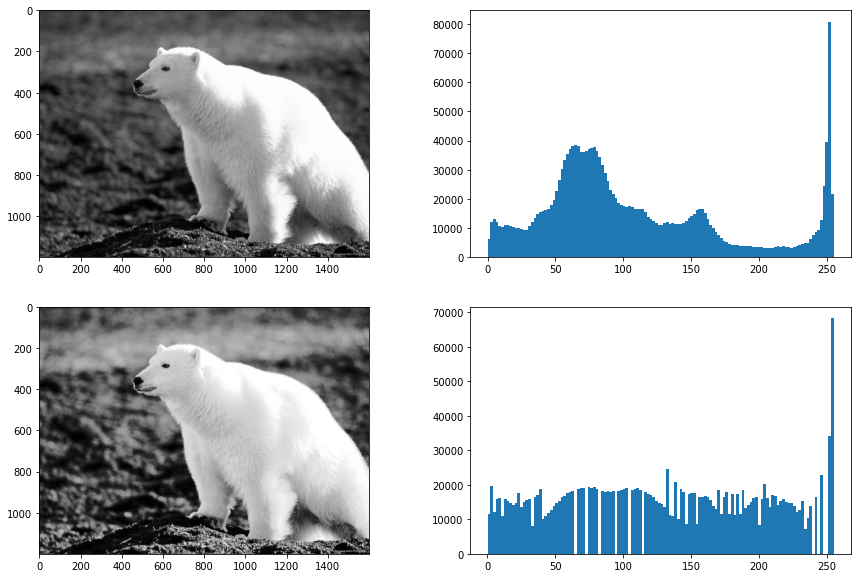

In [23]:
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(np.array(im), cmap="gray")
subplot(2,2,2), hist(np.array(im).flatten(), 128)
subplot(2,2,3), imshow(im6, cmap="gray")
subplot(2,2,4), hist(np.array(im6).flatten(), 128)
show()

## Задание 6. Выровните гистограмму изображения p1 с помощью вычисления частного: разделите изображение на его размытый вариант.

In [24]:
from scipy.ndimage import filters

In [26]:
im10 = 2*im/im6
im11, cdf = hst(im10)
pim11 = Image.fromarray(uint8(im11)) 
pim11.save('bear_pim11.jpg')

<ipython-input-22-4c72d9bd1cf2>:2: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imh, b = histogram(im.flatten(),ib,normed=True)


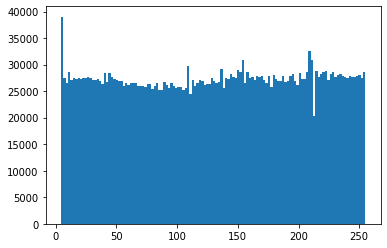

In [ ]:
hist(im11.flatten(),128)
show()

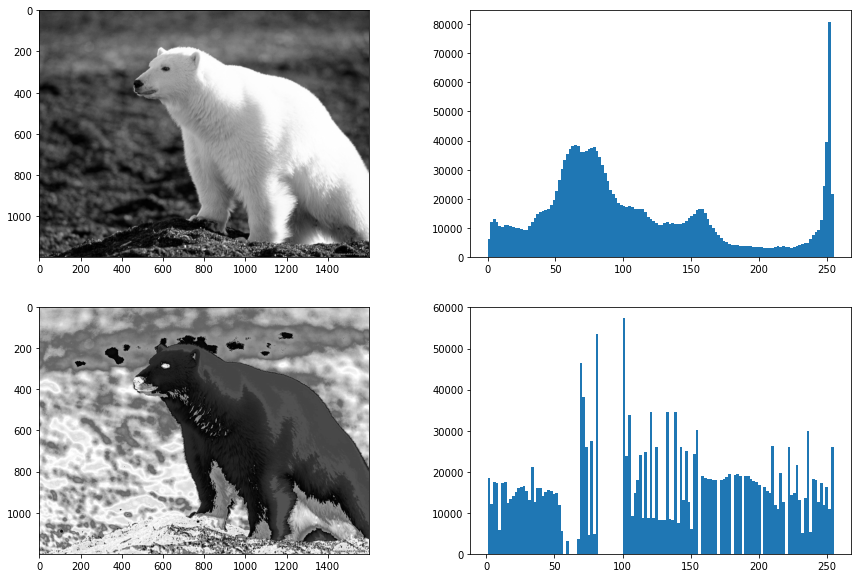

In [27]:
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(np.array(im), cmap="gray")
subplot(2,2,2), hist(np.array(im).flatten(), 128)
subplot(2,2,3), imshow(im11, cmap="gray")
subplot(2,2,4), hist(np.array(im11).flatten(), 128)
show()

## 7. Выполните размытие изображения по Гауссу с произвольным значением . Нарисуйте изолинии для различных значений и сравните их.

In [28]:
im8 = filters.gaussian_filter(im, 5)[::-1]
im81 = filters.gaussian_filter(im, 15)[::-1]
im82 = filters.gaussian_filter(im, 30)[::-1]

<ipython-input-28-9184641ed9d0>:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im8 = filters.gaussian_filter(im, 5)[::-1]
<ipython-input-28-9184641ed9d0>:2: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im81 = filters.gaussian_filter(im, 15)[::-1]
<ipython-input-28-9184641ed9d0>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  im82 = filters.gaussian_filter(im, 30)[::-1]


<Figure size 432x288 with 0 Axes>

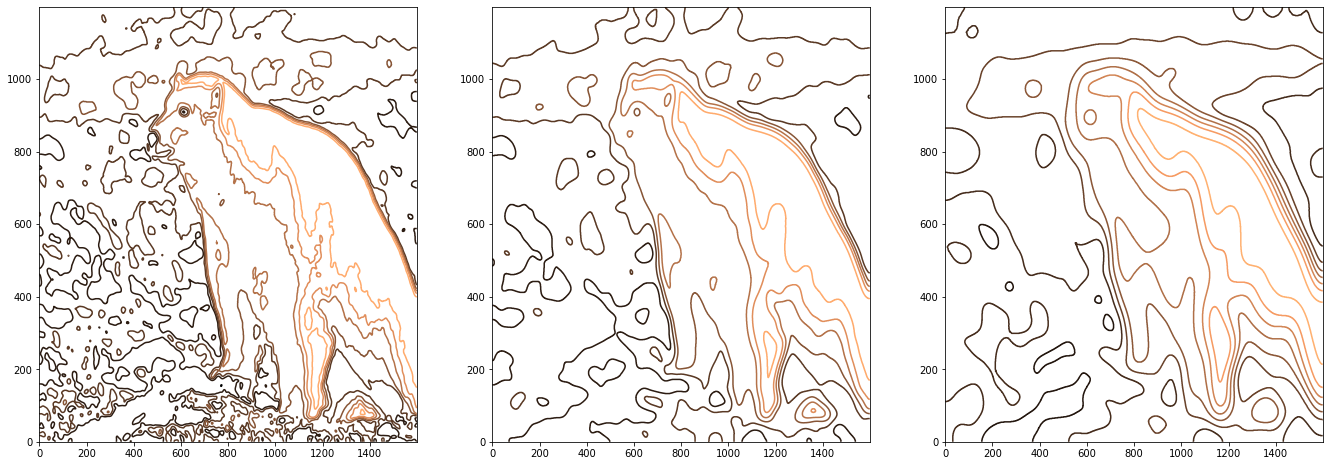

In [29]:
figure()
plt.figure(figsize=(23, 8))
subplot(1,3,1), matplotlib.pyplot.contour(im8, cmap='copper')
subplot(1,3,2), matplotlib.pyplot.contour(im81, cmap='copper')
subplot(1,3,3), matplotlib.pyplot.contour(im82, cmap='copper')
show()

<Figure size 432x288 with 0 Axes>

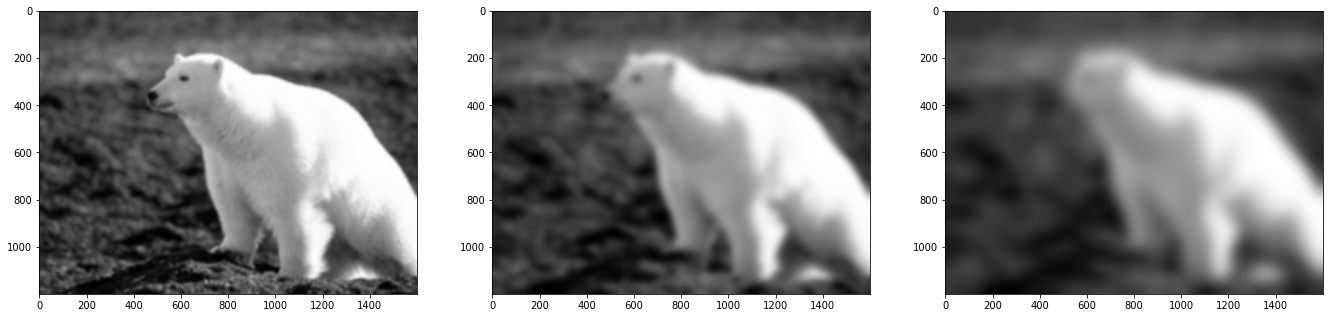

In [30]:
figure()
plt.figure(figsize=(23, 8))
subplot(1,3,1), imshow(np.array(im8)[::-1], cmap="gray")
subplot(1,3,2), imshow(np.array(im81)[::-1], cmap="gray")
subplot(1,3,3), imshow(np.array(im82)[::-1], cmap="gray")
show()

## 8. Найдите границы изображения p1 c помощью фильтра Гаусса и операторов Собеля (+ оператор Прюитта)

In [31]:
s = 5

In [32]:
imx = zeros(im.shape)

<ipython-input-33-6c28bedf5737>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (s,s),(0,1),imx)
<ipython-input-33-6c28bedf5737>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.gaussian_filter(im, (s,s),(1,0),imy)


<Figure size 432x288 with 0 Axes>

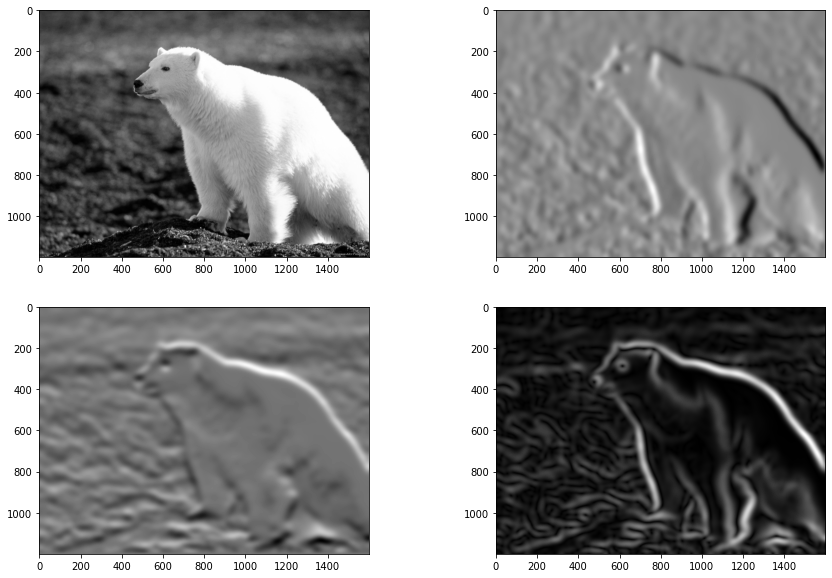

In [33]:
s = 15
imx = zeros(im.shape)
filters.gaussian_filter(im, (s,s),(0,1),imx)
imy = zeros(im.shape)
filters.gaussian_filter(im, (s,s),(1,0),imy)
m = sqrt(imx**2+imy**2)
figure()
gray
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(im, cmap="gray")
subplot(2,2,2), imshow(imx, cmap="gray")
subplot(2,2,3), imshow(imy, cmap="gray")
subplot(2,2,4), imshow(m, cmap="gray")
show()

<ipython-input-34-dc187b21e16d>:2: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im,1,imx)
<ipython-input-34-dc187b21e16d>:4: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.sobel(im,0,imy)


<Figure size 432x288 with 0 Axes>

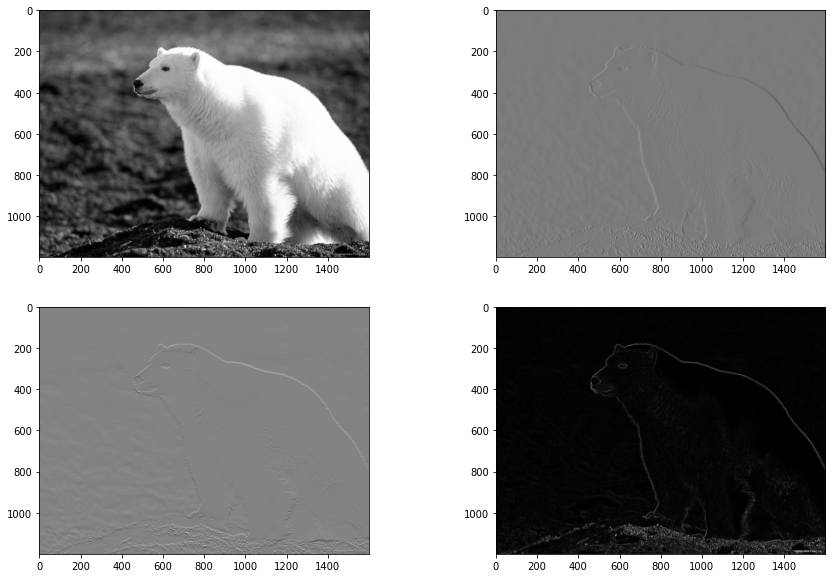

In [34]:
imx = zeros(im.shape)
filters.sobel(im,1,imx)
imy = zeros(im.shape)
filters.sobel(im,0,imy)
m = sqrt(imx**2+imy**2)
figure()
gray
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(im, cmap="gray")
subplot(2,2,2), imshow(imx, cmap="gray")
subplot(2,2,3), imshow(imy, cmap="gray")
subplot(2,2,4), imshow(m, cmap="gray")
show()

In [35]:
import scipy

In [36]:
scipy.ndimage.prewitt(im, axis=-1,output=None,mode='reflect', cval=0.0)

array([[253, 247, 246, ...,   3,   3,   0],
       [253, 247, 245, ...,   3,   4,   1],
       [253, 248, 247, ...,   4,   4,   1],
       ...,
       [ 10,  25,  28, ..., 237, 247, 253],
       [ 12,  31,  38, ..., 220, 242,   3],
       [ 14,  34,  43, ..., 201, 232,   4]], dtype=uint8)

<ipython-input-37-fd2bde859154>:2: DeprecationWarning: Please use `prewitt` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.prewitt(im,1,imx)
<ipython-input-37-fd2bde859154>:4: DeprecationWarning: Please use `prewitt` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  filters.prewitt(im,0,imy)


<Figure size 432x288 with 0 Axes>

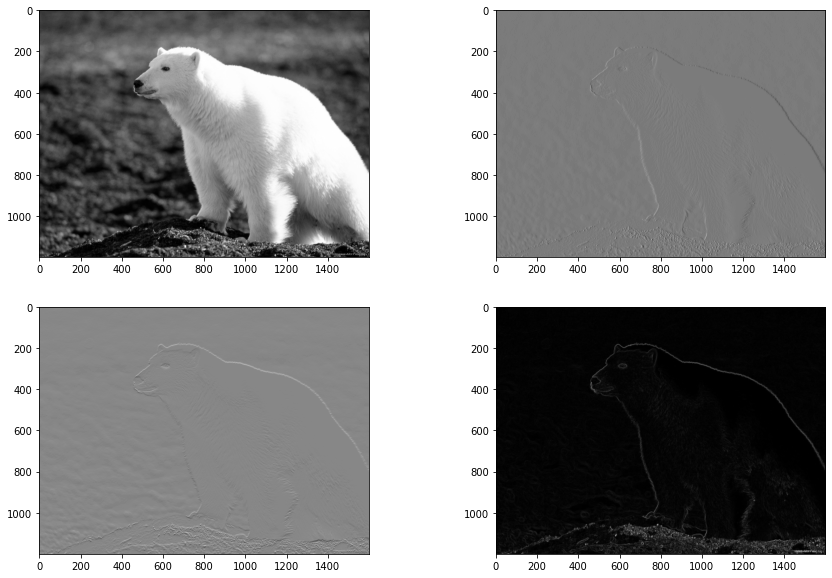

In [37]:
imx = zeros(im.shape)
filters.prewitt(im,1,imx)
imy = zeros(im.shape)
filters.prewitt(im,0,imy)
m = sqrt(imx**2+imy**2)
figure()
gray
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(im, cmap="gray")
subplot(2,2,2), imshow(imx, cmap="gray")
subplot(2,2,3), imshow(imy, cmap="gray")
subplot(2,2,4), imshow(m, cmap="gray")
show()

## 9. Бинаризируйте изображение p1. Вычислите количество разных объектов на нем. Воспользуйтесь функцией бинарного открытия, чтобы убрать перемычки между объектами. Вычислите центры масс для найденных объектов.

In [38]:
from scipy.ndimage import measurements, morphology


<ipython-input-39-8bba03893d94>:2: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  l, no=measurements.label(im12)
<ipython-input-39-8bba03893d94>:7: DeprecationWarning: Please use `binary_opening` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  imop=morphology.binary_opening(im12, ones((9,5)),iterations=4)
<ipython-input-39-8bba03893d94>:8: DeprecationWarning: Please use `label` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  lo, no = measurements.label(imop)
<ipython-input-39-8bba03893d94>:10: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  g = measurements.center_of_mass(imop, lo, range(1,99))


кол-во объектов:  434


/usr/local/lib/python3.8/dist-packages/scipy/ndimage/_measurements.py:1534: RuntimeWarning: invalid value encountered in true_divide
  results = [sum(input * grids[dir].astype(float), labels, index) / normalizer


кол-во объектов:  10


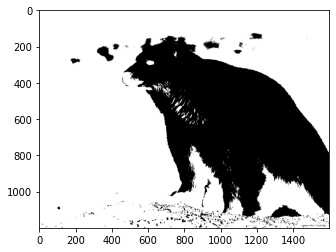

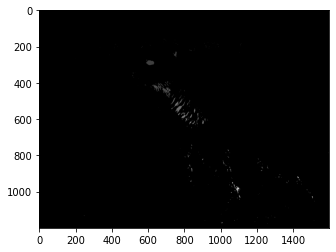

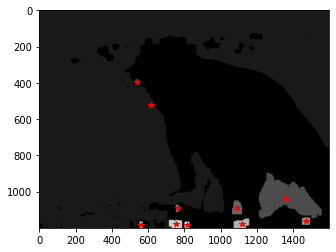

<Figure size 432x288 with 0 Axes>

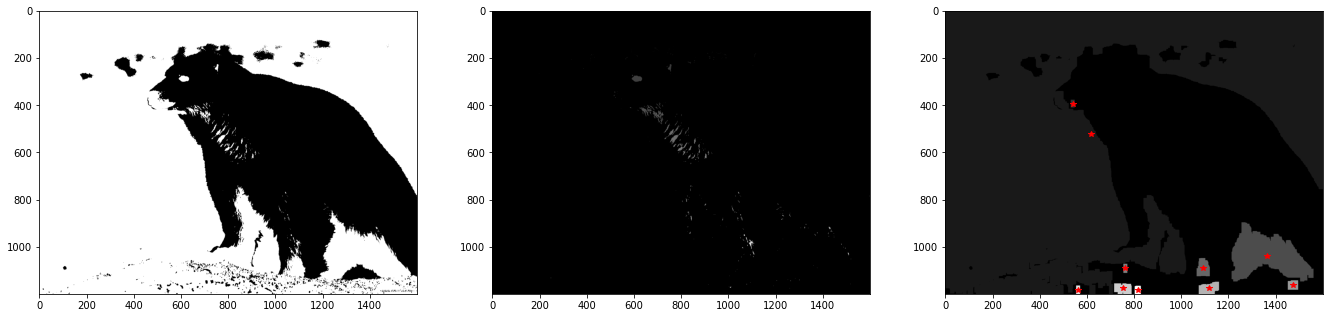

In [39]:
im12=1*(im<128)
l, no=measurements.label(im12)
print("кол-во объектов: ", no)
imshow(im12, cmap="gray")
figure()
imshow(l, cmap="gray")
imop=morphology.binary_opening(im12, ones((9,5)),iterations=4)
lo, no = measurements.label(imop)
figure()
g = measurements.center_of_mass(imop, lo, range(1,99)) 
imshow(lo, cmap="gray")
for x, y in g:
    plot(y,x, 'r*')
#pim1=Image.fromarray(uint8(lo))
print("кол-во объектов: ", no)
show()

figure()
plt.figure(figsize=(23, 8))
subplot(1,3,1), imshow(im12, cmap="gray")
subplot(1,3,2), imshow(l, cmap="gray")
subplot(1,3,3), imshow(lo, cmap="gray")
for x, y in g:
    plot(y,x, 'r*')
show()

## 10. Выполните операцию нерезкого маскирования для p1 (полутоновому и полутоновому и цветному)

In [41]:
imq=Image.open('bear.jpg')
imq = imq.convert('L')

In [42]:
imq2 = filters.gaussian_filter(imq, 5)

<ipython-input-42-3bc99a4da4f1>:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  imq2 = filters.gaussian_filter(imq, 5)


In [43]:
imq3 = 2*np.array(imq) - np.array(imq2)

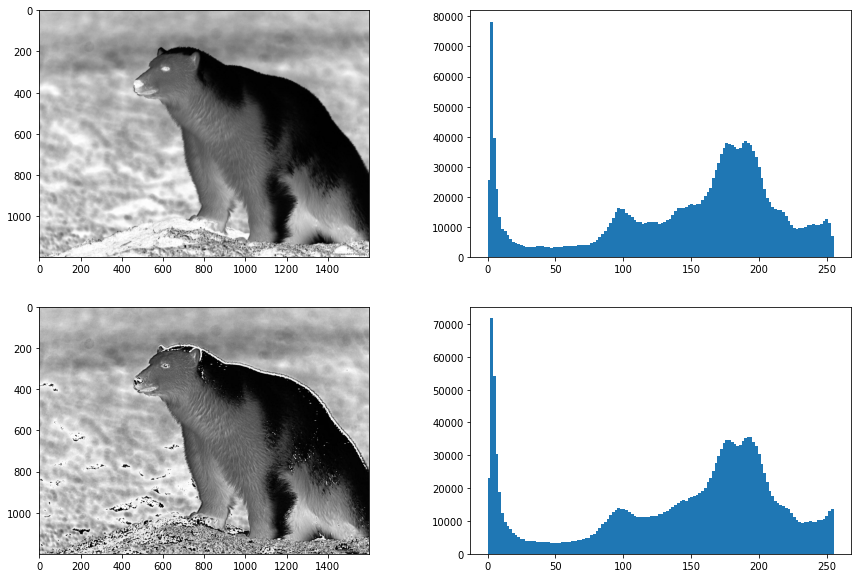

In [44]:
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(imq, cmap='gray')
subplot(2,2,2), hist(np.array(imq).flatten(), 128)
subplot(2,2,3), imshow(imq3, cmap='gray')
subplot(2,2,4), hist(np.array(imq3).flatten(), 128)
show()

In [45]:
imq=Image.open('bear.jpg')
imq = np.array(imq)

In [50]:
imq2 = zeros(imq.shape)
for i in range(3):
    imq2[:,i]=filters.gaussian_filter(imq[:,i],5)
imq2 = uint8(imq2)
imq3 = 2*np.array(imq) - np.array(imq2)

<ipython-input-50-c49a1ee1968f>:3: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  imq2[:,i]=filters.gaussian_filter(imq[:,i],5)


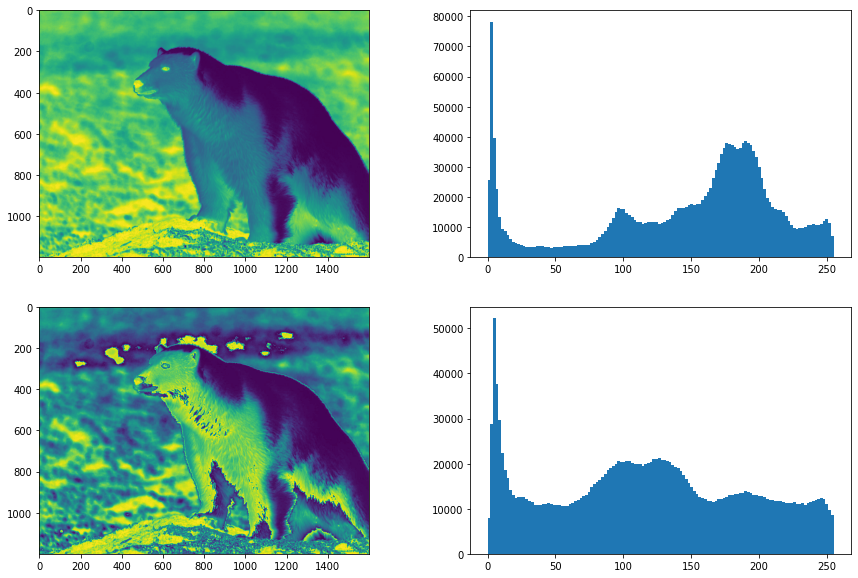

In [51]:
plt.figure(figsize=(15, 10))
subplot(2,2,1), imshow(imq)
subplot(2,2,2), hist(np.array(imq).flatten(), 128)
subplot(2,2,3), imshow(imq3)
subplot(2,2,4), hist(np.array(imq3).flatten(), 128)
show()

## 11. Сегментируйте изображение любыми двумя алгоритмами кластеризации. Взяла алгоритмы k-средних и Hierarchical Clustering

In [52]:
from scipy.cluster.vq import *

(1200, 1600)
[[197.344   197.344   197.344  ]
 [196.05867 196.05867 196.05867]
 [202.09067 202.09067 202.09067]
 ...
 [237.26134 237.26134 237.26134]
 [197.13066 197.13066 197.13066]
 [187.69333 187.69333 187.69333]]


<Figure size 432x288 with 0 Axes>

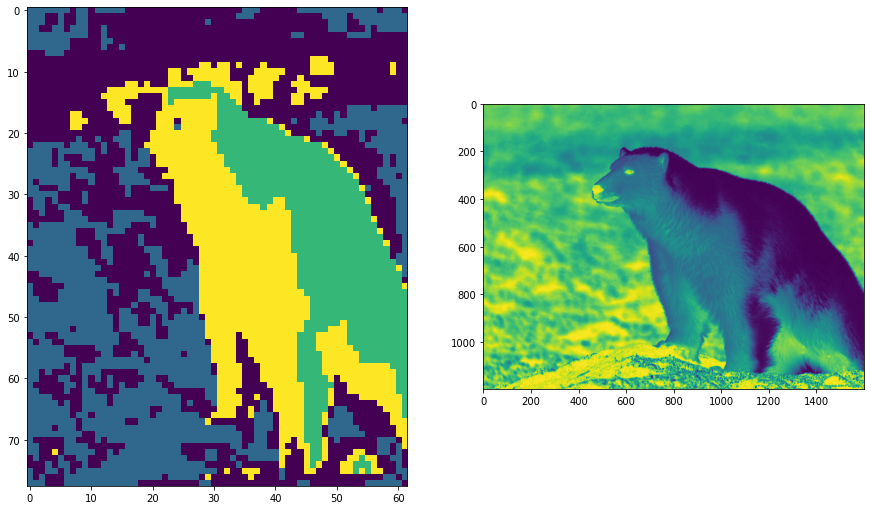

In [55]:
steps1 = 78
steps2 = 62
im = array(Image.open('bear.jpg'))
print(im.shape)
dy = im.shape[0] // steps1
dx = im.shape[1] // steps2
features = []
for y in range (steps1):
    for x in range (steps2):
        R = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        G = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        B = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        features.append([R,G,B])
features = array(features, 'f')
print(features)
centroids, variance = kmeans(features, 4)
code, distance = vq(features, centroids)

codeim = code.reshape(steps1, steps2)

figure()
plt.figure(figsize=(15, 10))
subplot(1,2,1), imshow (codeim)
subplot(1,2,2), imshow (im)
show()

In [56]:
from sklearn.cluster import SpectralClustering

(1200, 1600)
[[197.344   197.344   197.344  ]
 [196.05867 196.05867 196.05867]
 [202.09067 202.09067 202.09067]
 ...
 [237.26134 237.26134 237.26134]
 [197.13066 197.13066 197.13066]
 [187.69333 187.69333 187.69333]]


<Figure size 432x288 with 0 Axes>

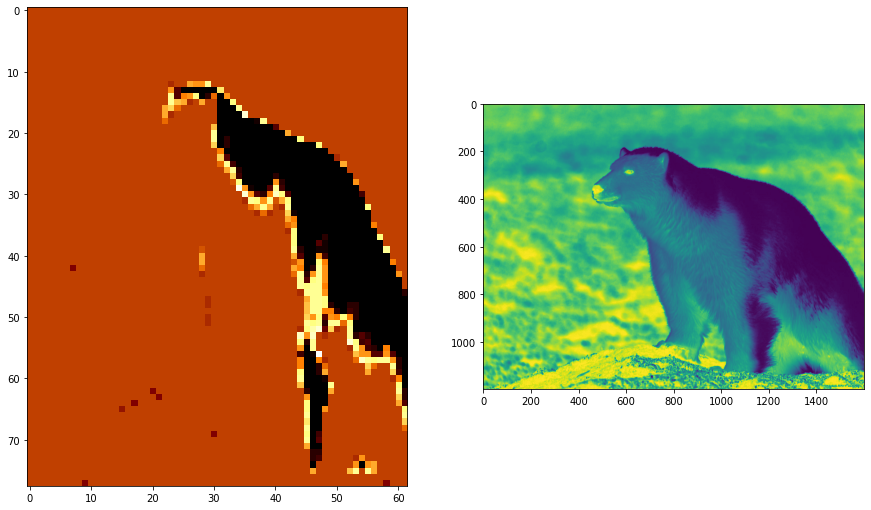

In [57]:
from scipy.cluster.hierarchy import *
from scipy.spatial.distance import pdist
steps1 = 78
steps2 = 62
im = array(Image.open('bear.jpg'))
print(im.shape)
dy = im.shape[0] // steps1
dx = im.shape[1] // steps2
features = []
for y in range (steps1):
    for x in range (steps2):
        R = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        G = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        B = mean(im[y*dy:(y+1)*dy, x*dx:(x+1)*dx])
        features.append([R,G,B])
features = array(features, 'f')
print(features)

Z = single(pdist(features))
T = fcluster(Z, 1, criterion='distance')
codeim = T.reshape(steps1, steps2)

figure()
plt.figure(figsize=(15, 10))
subplot(1,2,1), imshow (codeim, cmap='afmhot')
subplot(1,2,2), imshow (im)
show()